In [22]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
#Read CSV File
df = pd.read_csv('data/crypto_data.csv')
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [9]:
#Filter Currencies that are being traded `IsTrading` and then drop

filtered_df = df[df['IsTrading'] == True]
filtered_df = df.drop(columns = 'IsTrading')
filtered_df




,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,PoW/PoS,NaN,21000000


In [11]:
#Remove all rows that have at least one null value. 
filtered_df = filtered_df.dropna()
filtered_df


,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000
1247,XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000


In [18]:
#Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero
mined_df = filtered_df[filtered_df['TotalCoinsMined'] > 0]
mined_df


,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000
1247,XBC,BitcoinPlus,Scrypt,PoS,1.283270e+05,1000000


In [20]:
#Delete the `CoinName` and 'Unnamed: 0' from the original dataframe

new_df = mined_df.drop(columns = ['Unnamed: 0', 'CoinName'])
new_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000
1247,Scrypt,PoS,1.283270e+05,1000000


In [21]:
#Convert the remaining features with text values, `Algorithm` and `ProofType`, into numerical data
X = pd.get_dummies(new_df, columns = ['Algorithm', 'ProofType'])
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1247,1.283270e+05,1000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#Standardize your dataset so that columns that contain larger values do not unduly influence the outcome

X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.11450078, -0.15072489, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [-0.09041991, -0.14255828, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [ 0.55369883,  4.67185916, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       ...,
       [-0.11433426, -0.15040252, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [-0.11449785, -0.15070954, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667],
       [-0.11401032, -0.14918981, -0.04166667, ..., -0.04166667,
        -0.04166667, -0.04166667]])

In [26]:
X_scaled.shape

(577, 101)

In [29]:
#Initialize PCA model with 90% 
pca = PCA(n_components=0.90)
pca_transformed_data = pca.fit_transform(X_scaled)
pca_transformed_data

array([[-3.25873467e-01,  1.13989379e+00, -5.58793131e-01, ...,
        -4.60257758e-15,  2.17180165e-15,  2.04939783e-15],
       [-3.08532273e-01,  1.14012328e+00, -5.59207977e-01, ...,
        -5.38398257e-15,  1.89495381e-15,  2.20842641e-15],
       [ 2.42049045e+00,  1.71779871e+00, -6.35945634e-01, ...,
         7.86335322e-14, -4.48023466e-14,  1.17877844e-15],
       ...,
       [-1.50690337e-01, -2.07676698e+00,  3.80761010e-01, ...,
        -4.73535827e-16, -8.18098464e-16, -1.03118784e-15],
       [-2.79988707e-01,  7.92128764e-01, -2.56735735e-01, ...,
        -4.12375233e-16,  2.62629084e-15,  3.31383644e-16],
       [-3.24864062e-01,  1.13985756e+00, -5.58810407e-01, ...,
        -4.40222413e-15,  2.66327193e-15,  2.23688565e-15]])

In [30]:
# Check that dimensions have been reduced to two
pca_transformed_data.shape

(577, 77)

In [32]:
# Reduce the dataset dimensions with t-SNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(pca_transformed_data)
tsne_features

array([[-10.414494  ,  12.743545  ],
       [-17.698528  ,  15.438749  ],
       [-25.832365  ,  16.881231  ],
       ...,
       [  3.056641  , -20.98237   ],
       [ 15.608375  ,  -0.92538387],
       [-15.614305  ,  11.221479  ]], dtype=float32)

In [33]:
# Check that dimensions have been reduced to two
tsne_features.shape

(577, 2)

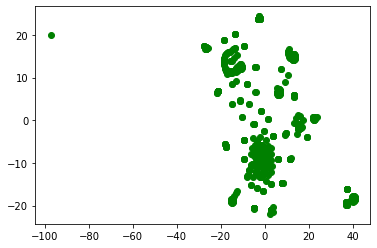

In [38]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1], c='Green')
plt.show()

In [39]:
#Create an elbow plot to identify the best number of clusters. Use a for-loop to determine the inertia for each `k` between 1 through 10. Determine, if possible, where the elbow of the plot is, and at which value of `k` it appears.
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_transformed_data)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,52647.245210
1,2,51490.471495
2,3,50703.562584
3,4,48971.788513
4,5,48014.849993


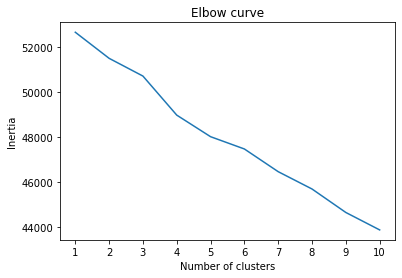

In [41]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()

There are a good number of insights to gather from the methods used, but based on the elbow graph, we cannot determine the k values. 
